In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
Admission_data=pd.read_csv("admission_data.csv")
Admission_data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [24]:
Admission_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [25]:
Admission_data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [26]:
drop_data=Admission_data.drop('Serial No.',axis=1)
drop_data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


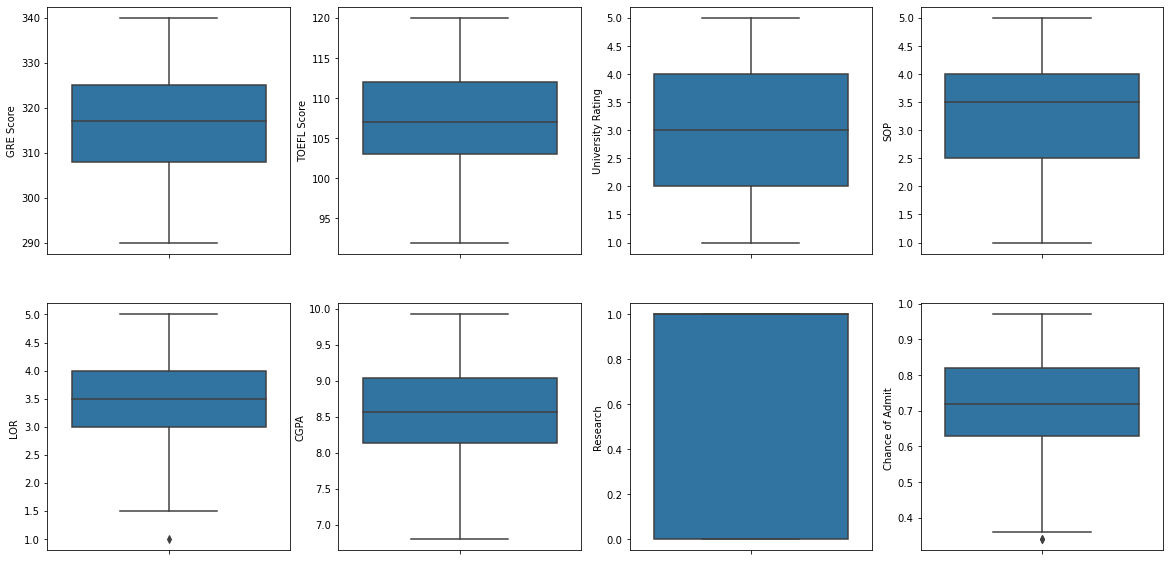

In [27]:
fig,axs=plt.subplots(nrows=2,ncols=4,figsize=(20,10))
index=0
axs = axs.flatten() # 안하면 2차원 배열이 되서 아래와 같은 식을 사용못함.
for i,k in drop_data.items():
    sns.boxplot(y=k,data=Admission_data,ax=axs[index])
    index+=1
plt.show()

* 추측이긴 하지만 GRE_Score랑 TOEFL 점수는 정규화가 필요할 듯 

In [31]:
drop_data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


* 추측 GRE Score, TOEFL, CGPA는 연관성이 매우 높다. 아마 이 3개는 정기적으로 칠 수 있는 시험이다 보니 목표 점수를 위해 계속해서 칠 수 있음. 노력의 여부에 따라 결정되는 것이므로 3개가 연관되어 있는 것 같다.  
* 그리고 위 3가지 요인이 합격에 영향을 많이 주는 것 같음.

In [32]:
drop_data.var()

GRE Score            127.580377
TOEFL Score           36.989114
University Rating      1.307619
SOP                    0.982088
LOR                    0.856457
CGPA                   0.365799
Research               0.246894
Chance of Admit        0.019921
dtype: float64

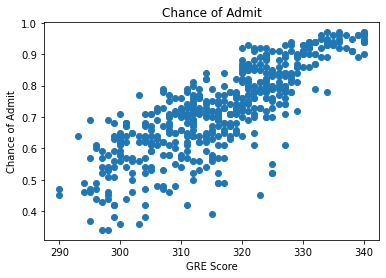

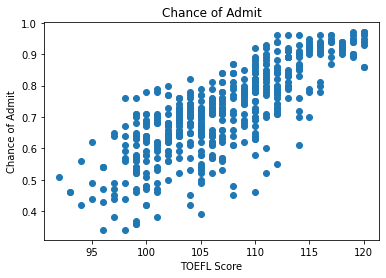

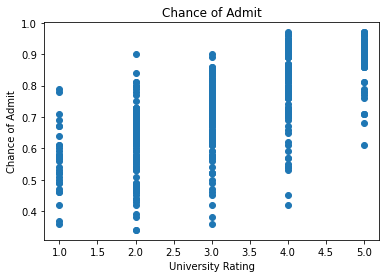

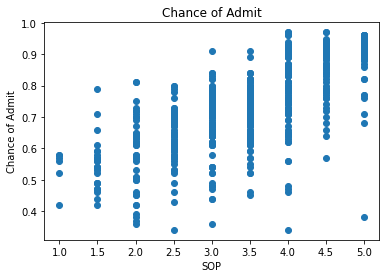

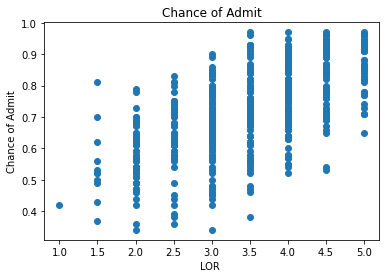

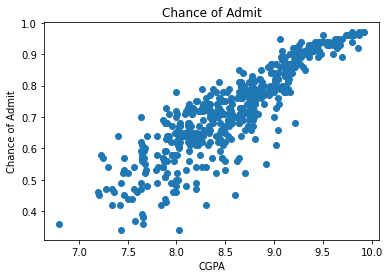

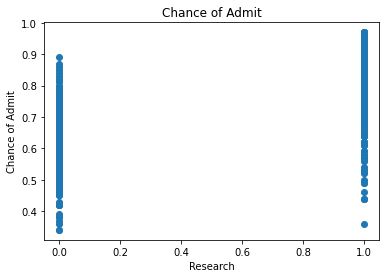

In [47]:
features=list(drop_data)[:7]
df_x=drop_data.loc[:,features]
for i in range(7):
    plt.scatter(df_x[features[i]],drop_data['Chance of Admit '])
    plt.title('Chance of Admit')
    plt.xlabel(features[i])
    plt.ylabel('Chance of Admit')
    plt.show()

<AxesSubplot:>

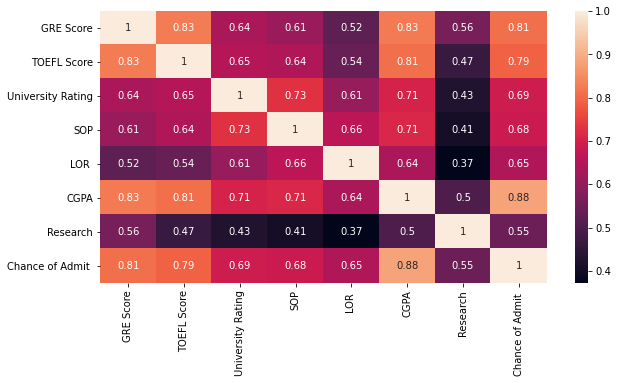

In [56]:
plt.figure(figsize=(10,5))
sns.heatmap(drop_data.corr(),annot=True)

* 예상한 것과 같이 chance of Admit과 가장 영향력이 있는 것은 CGPA , GRE Score , TOEFL Score임.

In [57]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [58]:
x=drop_data.drop('Chance of Admit ',axis=1)
y=drop_data['Chance of Admit ']
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)
x_train, x_test, y_train, y_test=train_test_split(x_scaler, y,test_size=0.2, random_state=777)

In [61]:
model=LinearRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
model.score(x_train,y_train)

0.8148005418776999

In [62]:
model.score(x_test,y_test)

0.8433449606442499